In [9]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import numpy as np
import pickle
from datetime import datetime

%matplotlib inline
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13

In [5]:
#set FIXED variables
#HOMEPATH = "/home/ubuntu/fastai/"
DATATPATH = "/home/ubuntu/fastai/data/urbanSound8k/"


In [23]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    print ("file_name:", file_name, type(X), X.shape)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    return mfccs,chroma,mel,contrast,tonnetz

def parse_audio_files(parent_dir,sub_dirs,file_ext='*.wav'):
    features, labels = np.empty((0,193)), np.empty(0)
    for label, sub_dir in enumerate(sub_dirs):
        for fn in glob.glob(os.path.join(parent_dir, sub_dir, file_ext)):
            mfccs, chroma, mel, contrast,tonnetz = extract_feature(fn)
            ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
            features = np.vstack([features,ext_features])
            #print ("fn:", fn)
            #print (fn.split('/'))
            labels = np.append(labels, fn.split('/')[8].split('-')[1])
    return np.array(features), np.array(labels, dtype = np.int)

In [25]:
parent_dir = DATATPATH+'audio/'
print (parent_dir)
sub_dirs = ['fold1','fold2','fold3']


features, labels = parse_audio_files(parent_dir,sub_dirs)

/home/ubuntu/fastai/data/urbanSound8k/audio/
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/87275-1-5-0.wav <class 'numpy.ndarray'> (2404,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/108362-2-0-21.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176714-2-0-40.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-1-3.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57320-0-0-42.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/125791-3-0-12.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/102842-3-1-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/99180-9-0-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46656-

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/73277-9-0-24.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-1-14.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/31323-3-0-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/134717-0-0-27.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/78360-4-0-3.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/164312-3-1-0.wav <class 'numpy.ndarray'> (43855,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/24074-1-0-9.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-1-15.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/138031-2-0-28.wav <class 'numpy.ndarray'> (88200,)


/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/108041-9-0-6.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/83199-9-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/197318-6-7-0.wav <class 'numpy.ndarray'> (40352,)


/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/9031-3-2-0.wav <class 'numpy.ndarray'> (50662,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/184355-1-0-0.wav <class 'numpy.ndarray'> (14553,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57320-0-0-21.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/157867-8-0-5.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/151977-0-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/175851-1-0-0.wav <class 'numpy.ndarray'> (31752,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/122690-6-0-0.wav <class 'numpy.ndarray'> (69367,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/55020-4-0-5.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/146186-5-0-5.wav <class 'numpy.ndarray'> (88200,)
file

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/17592-5-1-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176258-3-1-12.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/143651-2-0-22.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103258-5-0-10.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-2-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/177621-0-0-91.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/146186-5-0-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/97317-2-0-25.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-4-11.wav <class 'numpy.ndarray'> (88200

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/143651-2-0-63.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-15.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/160009-2-0-30.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176787-5-0-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/138031-2-0-13.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/59277-0-0-6.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176714-2-0-77.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/77246-6-0-0.wav <class 'numpy.ndarray'> (29271,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/165067-2-0-56.wav <class 'numpy.ndarray'> (88200

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/97317-2-0-22.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/59277-0-0-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/172314-9-0-40.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-11.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/31323-3-0-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-10.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-9.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/194732-9-0-95.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/138031-2-0-47.wav <class 'numpy.ndarray'> (88200,

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-5.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/159738-8-0-8.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/24074-1-0-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/77766-9-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/26270-9-0-19.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/108362-2-0-30.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/114587-3-0-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/51022-3-7-0.wav <class 'numpy.ndarray'> (24035,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/147764-4-2-0.wav <class 'numpy.ndarray'> (14333,)
fil

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/193698-2-0-140.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/78360-4-0-12.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/69304-9-0-14.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/197318-6-3-0.wav <class 'numpy.ndarray'> (43169,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/118101-3-0-6.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/127873-0-0-0.wav <class 'numpy.ndarray'> (44982,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57320-0-0-7.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/137156-9-0-31.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/119455-5-0-2.wav <class 'numpy.ndarray'> (88200,)

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/51022-3-13-0.wav <class 'numpy.ndarray'> (32193,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/55020-4-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/77766-9-0-5.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/124489-9-0-16.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-26.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/125791-3-0-9.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/26270-9-0-30.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/98223-7-9-0.wav <class 'numpy.ndarray'> (32634,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/137156-9-0-79.wav <class 'numpy.ndarray'> (88200,)
f

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/159738-8-0-3.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46669-4-0-24.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-1-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/159738-8-0-7.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/137156-9-0-30.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/147764-4-4-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46669-4-0-31.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46669-4-0-35.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176714-2-0-18.wav <class 'numpy.ndarray'> (88200,)

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/177621-0-0-88.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/113205-5-1-5.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/24074-1-0-11.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/7383-3-0-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/159738-8-0-11.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/30823-8-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/191431-9-0-61.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-4-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/197318-6-0-0.wav <class 'numpy.ndarray'> (33737,)
f

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/21684-9-0-50.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/113205-5-1-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/135776-2-0-50.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/155202-9-0-42.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/143651-2-0-55.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/174276-7-0-0.wav <class 'numpy.ndarray'> (52035,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/14113-4-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/77766-9-0-3.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/78360-4-0-20.wav <class 'numpy.ndarray'> (88200,)


/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/177621-0-0-105.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-0-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/172314-9-0-80.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/44736-5-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/108041-9-0-11.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-3-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57320-0-0-6.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/157867-8-0-12.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-4-0.wav <class 'numpy.ndarray'> (88200,

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-1-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/177621-0-0-93.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-24.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/164053-8-2-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/17592-5-1-3.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57553-3-2-0.wav <class 'numpy.ndarray'> (26811,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-2-8.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/151977-0-0-7.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/132016-9-0-20.wav <class 'numpy.ndarray'> (88200,)


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/155202-9-0-124.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/174294-6-1-0.wav <class 'numpy.ndarray'> (70036,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/94868-1-2-0.wav <class 'numpy.ndarray'> (8143,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/177621-0-0-126.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/164053-8-1-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/143604-5-0-0.wav <class 'numpy.ndarray'> (52185,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176787-5-0-29.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/55020-4-0-13.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/78360-4-0-0.wav <class 'numpy.ndarray'> (88200,)

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/164312-3-3-0.wav <class 'numpy.ndarray'> (36987,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/157867-8-0-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57320-0-0-24.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/124489-9-0-14.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/17592-5-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/172314-9-0-72.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/124489-9-0-17.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/76093-6-0-0.wav <class 'numpy.ndarray'> (19184,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176787-5-0-6.wav <class 'numpy.ndarray'> (88200,)


/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/193394-3-0-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/21684-9-0-5.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/193698-2-0-113.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/164053-8-2-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/21684-9-0-12.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46918-5-0-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/166268-3-2-0.wav <class 'numpy.ndarray'> (4631,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/24074-1-0-10.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/99180-9-0-48.wav <class 'numpy.ndarray'> (88200,)
fi

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/57584-4-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-1-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/192124-2-0-15.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176787-5-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/46656-6-2-0.wav <class 'numpy.ndarray'> (33013,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/108362-2-0-9.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-1-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/51022-3-30-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/176787-5-0-19.wav <class 'numpy.ndarray'> (88200,)
f

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/113205-5-1-6.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/134717-0-0-25.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/151977-0-0-6.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/157867-8-0-17.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-4-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/97317-2-0-28.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/118279-8-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/159738-8-0-18.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/137156-9-0-5.wav <class 'numpy.ndarray'> (88200,

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/194732-9-0-126.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/203356-3-0-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/86278-6-0-0.wav <class 'numpy.ndarray'> (25073,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/174276-7-5-0.wav <class 'numpy.ndarray'> (63284,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/180937-7-3-31.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/103074-7-3-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/161702-9-0-8.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/99180-9-0-7.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold1/139951-9-0-45.wav <class 'numpy.ndarray'> (88200,)

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/149370-9-0-32.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/72567-1-4-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/96920-9-0-11.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/123688-8-0-5.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/179866-1-1-0.wav <class 'numpy.ndarray'> (15775,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/147926-0-0-52.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/60591-2-0-12.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/60605-9-0-73.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/123688-8-0-8.wav <class 'numpy.ndarray'> (88200,)


/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/104817-4-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/174906-2-0-20.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/189991-0-0-5.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/180126-4-4-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/113785-3-1-0.wav <class 'numpy.ndarray'> (13230,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/146690-0-0-100.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/143970-5-0-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/112195-3-0-48.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-3-4.wav <class 'numpy.ndarray'> (88200

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/174293-6-1-0.wav <class 'numpy.ndarray'> (51291,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/34621-4-24-0.wav <class 'numpy.ndarray'> (23053,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/149370-9-0-19.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/159747-8-0-8.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74226-9-0-14.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/72567-1-5-0.wav <class 'numpy.ndarray'> (87539,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/196067-2-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/147926-0-0-54.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/123688-8-0-1.wav <class 'numpy.ndarray'> (88200,)


/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/123688-8-0-13.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/76086-4-0-18.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74507-0-0-14.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/93193-9-1-6.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/169098-7-4-8.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-5-3.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-4-6.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74507-0-0-12.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/109703-2-0-48.wav <class 'numpy.ndarray'> (88200,)


/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/162541-1-1-0.wav <class 'numpy.ndarray'> (9906,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/91396-8-0-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/149254-9-0-56.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/178521-2-0-69.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/113201-5-0-6.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74507-0-0-16.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/197320-6-11-0.wav <class 'numpy.ndarray'> (66591,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-5-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/189023-0-0-3.wav <class 'numpy.ndarray'> (88200,)


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/155219-2-0-57.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/169098-7-0-9.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/106015-5-0-13.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/146690-0-0-154.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/158597-2-0-30.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/174906-2-0-14.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/173995-3-0-11.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/98202-9-1-20.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/96475-9-0-5.wav <class 'numpy.ndarray'> (882

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/34621-4-14-0.wav <class 'numpy.ndarray'> (12768,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/123688-8-0-9.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/174994-3-0-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74507-0-0-6.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/118723-4-0-0.wav <class 'numpy.ndarray'> (58433,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/147672-3-1-0.wav <class 'numpy.ndarray'> (10143,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/102871-8-0-12.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/4911-3-0-0.wav <class 'numpy.ndarray'> (4616,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74226-9-0-7.wav <class 'numpy.ndarray'> (88200,)
file_

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/143970-5-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-7-14.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/192269-2-0-35.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-2-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/102104-3-0-0.wav <class 'numpy.ndarray'> (17861,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/60591-2-0-16.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/113201-5-0-7.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-3-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74458-9-1-5.wav <class 'numpy.ndarray'> (88200,)


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/102858-5-0-0.wav <class 'numpy.ndarray'> (88200,)


/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/106015-5-0-15.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/104817-4-0-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-4-8.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-5-5.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/185800-4-2-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/147926-0-0-27.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-6-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/72567-1-4-3.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/159747-8-0-12.wav <class 'numpy.ndarray'> (88200,)

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/189023-0-0-11.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/132073-1-2-0.wav <class 'numpy.ndarray'> (8068,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/23131-3-5-0.wav <class 'numpy.ndarray'> (13816,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/146690-0-0-86.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/177592-5-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-2-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/23131-3-0-0.wav <class 'numpy.ndarray'> (24444,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/76086-4-0-27.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-9-20.wav <class 'numpy.ndarray'> (88200,)
f

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74226-9-0-6.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/96169-9-1-3.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-9-15.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/152908-5-0-11.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/34621-4-25-0.wav <class 'numpy.ndarray'> (15215,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-2-3.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-3-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/60591-2-0-11.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/201652-5-4-9.wav <class 'numpy.ndarray'> (88200,)
f

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/104817-4-0-7.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/152908-5-0-12.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/22347-3-3-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/178520-2-0-23.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/40717-8-0-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/145608-6-2-0.wav <class 'numpy.ndarray'> (21126,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74507-0-0-22.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/113201-5-0-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/34621-4-5-0.wav <class 'numpy.ndarray'> (10995,)
fi

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/94710-5-1-0.wav <class 'numpy.ndarray'> (45988,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/54545-3-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/172593-2-0-28.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/77751-4-2-0.wav <class 'numpy.ndarray'> (84122,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/146690-0-0-140.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/182739-2-0-62.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/145608-6-0-0.wav <class 'numpy.ndarray'> (22247,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/169098-7-0-3.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/102871-8-0-14.wav <class 'numpy.ndarray'> (88200,)

/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/106015-5-0-18.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-9-11.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/147926-0-0-41.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/72539-3-0-8.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/97193-3-0-6.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/174906-2-0-18.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/18581-3-0-5.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/108187-3-3-0.wav <class 'numpy.ndarray'> (23814,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/159750-8-0-0.wav <class 'numpy.ndarray'> (88200,)


/usr/local/lib/python3.5/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/113201-5-0-5.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/39970-9-0-142.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/60605-9-0-34.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/44735-5-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/123688-8-1-3.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/97193-3-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/109703-2-0-32.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/159747-8-0-9.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/169098-7-0-6.wav <class 'numpy.ndarray'> (88200,)
f

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/174906-2-0-6.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/189023-0-0-10.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/197320-6-4-0.wav <class 'numpy.ndarray'> (63063,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/203929-7-10-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/74507-0-0-24.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/79377-9-0-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/197320-6-8-0.wav <class 'numpy.ndarray'> (52909,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/147926-0-0-44.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold2/174293-6-0-0.wav <class 'numpy.ndarray'> (54243,)

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-1-21.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/117048-3-0-17.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/165039-7-4-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/19496-3-1-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/186336-9-0-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/31884-7-0-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/94636-8-0-14.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/155263-2-0-43.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/94636-8-0-17.wav <class 'numpy.ndarray'> (88200,)
f

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/17853-5-0-11.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/188824-7-5-0.wav <class 'numpy.ndarray'> (30209,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/69598-4-2-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/13230-0-0-25.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/9223-2-0-5.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/17973-2-0-22.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/29721-4-0-9.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/22601-8-0-12.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/186339-9-0-3.wav <class 'numpy.ndarray'> (88200,)
file_

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/184725-3-0-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/76094-6-0-0.wav <class 'numpy.ndarray'> (20066,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/177742-0-0-165.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/52357-6-0-0.wav <class 'numpy.ndarray'> (19176,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/9223-2-0-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/42117-8-0-3.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/165039-7-12-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/17853-5-0-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/95562-4-2-0.wav <class 'numpy.ndarray'> (88200,)
file_

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/94636-8-0-12.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/9223-2-0-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/135526-6-1-0.wav <class 'numpy.ndarray'> (31973,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-1-15.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/22601-8-0-10.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/121528-8-1-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-1-81.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/76221-2-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/30204-0-0-11.wav <class 'numpy.ndarray'> (88200,)
file

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/72537-3-0-8.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/94631-9-1-16.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/123399-2-0-54.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/125523-3-0-11.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/93065-9-0-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/146714-0-0-36.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/166101-5-3-0.wav <class 'numpy.ndarray'> (71001,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-0-17.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/186334-2-0-11.wav <class 'numpy.ndarray'> (88200,)

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/135526-6-0-0.wav <class 'numpy.ndarray'> (32533,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/169044-2-0-21.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/19496-3-1-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/135526-6-8-0.wav <class 'numpy.ndarray'> (41013,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/135526-6-6-0.wav <class 'numpy.ndarray'> (48510,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/155263-2-0-57.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/107228-5-0-7.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-0-7.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/22601-8-0-3.wav <class 'numpy.ndarray'> (88200,)
fi

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/155263-2-0-22.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/22601-8-0-34.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/165039-7-10-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/22601-8-0-9.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/22601-8-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/177742-0-0-149.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/146714-0-0-13.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/159761-0-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/103199-4-2-4.wav <class 'numpy.ndarray'> (88200,

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/123399-2-0-74.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/165039-7-16-0.wav <class 'numpy.ndarray'> (86216,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/123399-2-0-83.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/148838-6-2-0.wav <class 'numpy.ndarray'> (26460,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/17853-5-0-15.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/169044-2-0-10.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/179863-1-0-0.wav <class 'numpy.ndarray'> (16667,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/146714-0-0-38.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/118496-1-1-0.wav <class 'numpy.ndarray'> (4190

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/153261-0-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/132855-2-0-99.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-1-72.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/166101-5-2-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-1-56.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/94636-8-0-20.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/94636-8-0-11.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/69598-4-4-0.wav <class 'numpy.ndarray'> (35441,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/123399-2-0-19.wav <class 'numpy.ndarray'> (88200,)


file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/58806-0-0-0.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/33696-3-6-1.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/103199-4-2-9.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/54898-8-0-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/54898-8-0-5.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/41372-3-0-39.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/66622-4-0-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-1-73.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/146714-0-0-27.wav <class 'numpy.ndarray'> (88200,)
file_

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/30204-0-0-5.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/118961-3-0-0.wav <class 'numpy.ndarray'> (16979,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/13230-0-0-22.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/166101-5-1-0.wav <class 'numpy.ndarray'> (46052,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/62837-7-1-28.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/125523-3-0-3.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/159761-0-0-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/195451-5-0-4.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/74810-9-0-32.wav <class 'numpy.ndarray'> (88200,)
fi

file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/199769-1-0-12.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/103199-4-0-6.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/22601-8-0-14.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/151359-1-1-0.wav <class 'numpy.ndarray'> (3419,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/188824-7-1-0.wav <class 'numpy.ndarray'> (28886,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/107228-5-0-2.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/52077-3-0-13.wav <class 'numpy.ndarray'> (88200,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/34708-6-1-0.wav <class 'numpy.ndarray'> (29768,)
file_name: /home/ubuntu/fastai/data/urbanSound8k/audio/fold3/17853-5-0-12.wav <class 'numpy.ndarray'> (88200,)
fi

In [26]:
print ("features:", type(features), features.shape)
print ("labels:", type(labels), labels.shape)

features: <class 'numpy.ndarray'> (2686, 193)
labels: <class 'numpy.ndarray'> (2686,)


In [28]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [29]:
labels = one_hot_encode(labels)

train_test_split = np.random.rand(len(features)) < 0.70
train_x = features[train_test_split]
train_y = labels[train_test_split]
test_x = features[~train_test_split]
test_y = labels[~train_test_split]

In [31]:
print ("labels:", type(labels), labels.shape)
print ("train_x:", type(train_x), train_x.shape)
print ("train_y:", type(train_y), train_y.shape)
print ("test_x:", type(test_x), test_x.shape)
print ("test_y:", type(test_y), test_y.shape)

labels: <class 'numpy.ndarray'> (2686, 10)
train_x: <class 'numpy.ndarray'> (1909, 193)
train_y: <class 'numpy.ndarray'> (1909, 10)
test_x: <class 'numpy.ndarray'> (777, 193)
test_y: <class 'numpy.ndarray'> (777, 10)


In [32]:
#save features & labels to file, enable restart from pre-compiled position.
os.chdir(DATATPATH)
print (DATATPATH)
print ("current working directory:", os.getcwd())

pickle.dump( features, open(DATATPATH+"features_NN.p", "wb" ) )
pickle.dump( labels, open(DATATPATH+"labels_NN.p", "wb" ) )
print ("done")

/home/ubuntu/fastai/data/urbanSound8k/
current working directory: /home/ubuntu/fastai/data/urbanSound8k
done


###Training Neural Network with TensorFlow

In [34]:
import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support

In [35]:
training_epochs = 5000
n_dim = features.shape[1]
n_classes = 10
n_hidden_units_one = 280 
n_hidden_units_two = 300
sd = 1 / np.sqrt(n_dim)
learning_rate = 0.01

In [37]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim,n_hidden_units_one], mean = 0, stddev=sd))
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean = 0, stddev=sd))
h_1 = tf.nn.tanh(tf.matmul(X,W_1) + b_1)


W_2 = tf.Variable(tf.random_normal([n_hidden_units_one,n_hidden_units_two], mean = 0, stddev=sd))
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean = 0, stddev=sd))
h_2 = tf.nn.sigmoid(tf.matmul(h_1,W_2) + b_2)


W = tf.Variable(tf.random_normal([n_hidden_units_two,n_classes], mean = 0, stddev=sd))
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd))
y_ = tf.nn.softmax(tf.matmul(h_2,W) + b)

init = tf.global_variables_initializer()

In [38]:
cost_function = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_), reduction_indices=[1])) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [39]:
cost_history = np.empty(shape=[1],dtype=float)
y_true, y_pred = None, None
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):            
        _,cost = sess.run([optimizer,cost_function],feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,cost)
    
    y_pred = sess.run(tf.argmax(y_,1),feed_dict={X: test_x})
    y_true = sess.run(tf.argmax(test_y,1))

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


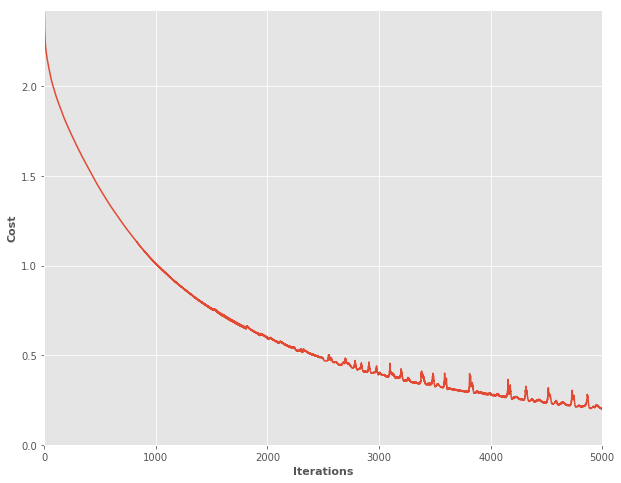

F-Score: 0.873


In [42]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print ("F-Score:", round(f,3))